# Installations

In [48]:
# May need to uncomment to install scikit-learn (sklearn)
#!pip install scikit-learn==0.23.1

In [49]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

# Load in Data

In [50]:
import csv

# name of file
filename = "iris.data"

# read in csv
pdf = pd.read_csv(filename, index_col=False)

# create dataframe
dataframe = pdf.to_numpy()
pdf = pd.DataFrame(dataframe)
pdf.rename(columns={0: 'sepal_length', 1: 'sepal_width', 2 : 'petal_length', 3 : 'petal_width', 4 : 'class'}, inplace=True)

# create dataframe of features (X) and classes (y)
X = pdf[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y = pdf[['class']]

# create array of features
features = pdf.columns

# create array of classes
classes = pdf['class'].unique()

# Familiarizing Ourselves With The Data

One important aspect of utilizing Machine Learning to solve a problem, is finding out if the problem can be solved in a more linear way with classical programming. In the case of the Iris dataset, we can ask ourselves can we just look at two measurements and always be able to clearly see that a given plant is Iris-virginica, Iris-setosa, or Iris-versicolor? So, let's take a peek at our data in a graphed form, graphed below with a set feature on the x and y axis (which you are encouraged to switch and tinker around with!).

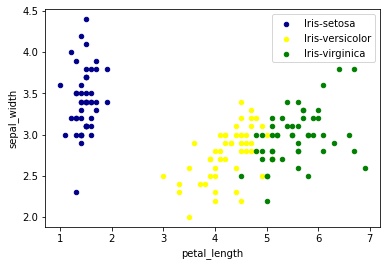

In [51]:
# resizing the figure - in (inches,inches)
figure_size = (8,8)

# setting the feature used on the x and y axis
feature_x = features[2]
feature_y = features[1]

# graphing all data points by color of iris type
ax = pdf[pdf['class'] == classes[0]][0:50].plot(kind='scatter', x=feature_x, y=feature_y, color='DarkBlue', label=classes[0]);
pdf[pdf['class'] == classes[1]][0:50].plot(kind='scatter', x=feature_x, y=feature_y, color='Yellow', label=classes[1], ax=ax);
pdf[pdf['class'] == classes[2]][0:50].plot(kind='scatter', x=feature_x, y=feature_y, color='Green', label=classes[2], ax=ax);
plt.show()

In the pursuit of familiarizing ourselves with our data, we now see that we are dealing with a complex issue with no clear classical solution, but the data does seem to be clumped together quite neatly when graphing by certain features (SWEET!). Let's go one step further and examine our features closer, and see what data types each feature is.

In [52]:
pdf.dtypes

sepal_length    object
sepal_width     object
petal_length    object
petal_width     object
class           object
dtype: object

For a number of machine learning algorithms, it is essential to have numerical (int, float, double) features and class data. We see that we have only object data types in our data. This is not great for analysis, so we will now substitute numerical values for our variables below.

In [61]:
# setting all numeric values from string to double is not a problem
pdf[features[0]] = pdf[features[0]].astype('double')
pdf[features[1]] = pdf[features[1]].astype('double')
pdf[features[2]] = pdf[features[2]].astype('double')
pdf[features[3]] = pdf[features[3]].astype('double')

# setting each class value to a numeric value
pdf.loc[pdf['class'] == 'Iris-setosa', 'class'] = 0
pdf.loc[pdf['class'] == 'Iris-versicolor', 'class'] = 1
pdf.loc[pdf['class'] == 'Iris-virginica', 'class'] = 2

# setting data type of the classes to int
pdf['class'] = pdf['class'].astype('int')

We are now at the point to start setting up our datasets to soon split them into train and test. For this, we will have X and y, X denoting the features of all rows and y denoting the class of each of the rows.

In [62]:
# creating X as an array of all features of all rows
feature_df = pdf[[features[0], features[1], features[2], features[3]]]
X = np.asarray(feature_df)

# creating y as an array of the class value of all rows
y = np.asarray(pdf['class'])

# printing to ensure that X and y are over the same number of rows (the first number must be the same for each shape)
print(X.shape)
print(y.shape)

(149, 4)
(149,)


# Splitting Data into Training and Testing sets

We will now split our data into training and testing sets. The training set will be used to train our model and the testing set will be used to test the accuracy of our model.

NOTE: test_size is the argument pertaining to the proportion of our dataset used for testing our model, but when set equal to 1, it uses only one row for testing.

In [67]:
# creating a training proportion of 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=.2, random_state=2)

# let's print out the shapes of the training set and the testing set
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (119, 4) (119,)
Test set: (30, 4) (30,)


Let us now create the Support Vector Machine and fit our model

In [57]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC()

Just as in statistics, yhat is a prediction of what the testset is going to be. Here it will show an array of all predictions from our test set.

In [58]:
yhat = clf.predict(X_test)
yhat [0:5]

array([2, 0, 0, 0, 2])

Here is a function defined to construct a confusion matrix

In [59]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Results

The Confusion Matrix is a powerful analysis tool used to determine the accuracy of a model in detail. On the x-axis is the model's predicted label and on the y-axis is the true label, as determined by our data.

Thus, the confusion matrix can be viewed as a grid, where the top left, middle, and bottom right boxes are when the predicted label agrees with the true label (i.e. top left = "the plant was predicted to be Iris-virginica and the plant was Iris-virginica", middle = "the plant was predicted to be Iris-setosa and the plant was Iris-setosa", and bottom right = "the plant was predicted to be Iris-versicolor and the plant was Iris-versicolor").

All other boxes display when the predicted label does NOT agree with the true label (i.e. bottom left = "the plant was predicted to be Iris-virginica and the plant was Iris-versicolor", bottom middle = "the plant was predicted to be Iris-setosa and the plant was Iris-versicolor", etc.).

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.89      0.94         9
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30

Confusion matrix, without normalization
[[12  0  0]
 [ 0  8  1]
 [ 0  0  9]]


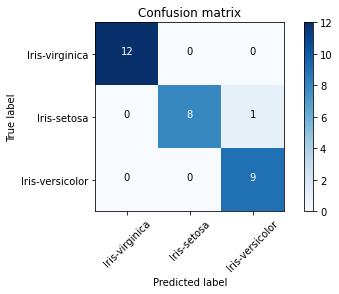

In [68]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Iris-virginica','Iris-setosa','Iris-versicolor'],normalize= False,  title='Confusion matrix')

# Analysis

So how did our model work? Well, looking at the confusion matrix above, we can see that our model correctly identified all but 1 instance! This instance was predicted to be Iris-versicolor by our model, however it was actually Iris-setosa. Feel free to tinker around with the code, testing size, etc to see if you can prove authorship of other texts in the dataset!